In [24]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
from IPython.display import Image
import os

In [ ]:
# create a function to read all audio and generate MEL spectograms (save them to local)
# create a function to read all audio and generate MFCC spectograms (save them to local)
# create a function to display in the notebook both MEL and MFCC spectograms for a few (parameter) audios

In [39]:
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    # librosa.display.specshow(log_ms, sr=sr)
    
    
    img = librosa.display.specshow(log_ms, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='Mel spectrogram display')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    
    fig.savefig(image_file)
    
    # plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [21]:
create_pngs_from_wavs('../../data/audios_VSD', '../../data/output')

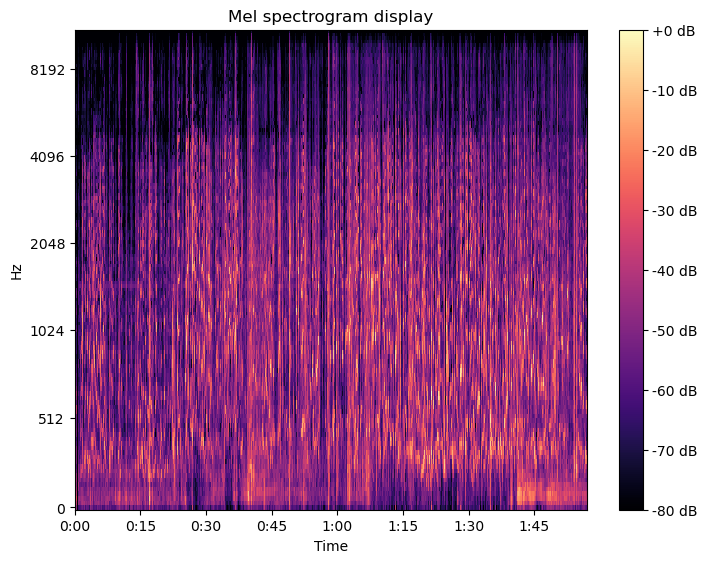

In [40]:
create_pngs_from_wavs('../../data/audios_VSD/single', '../../data/output/single')

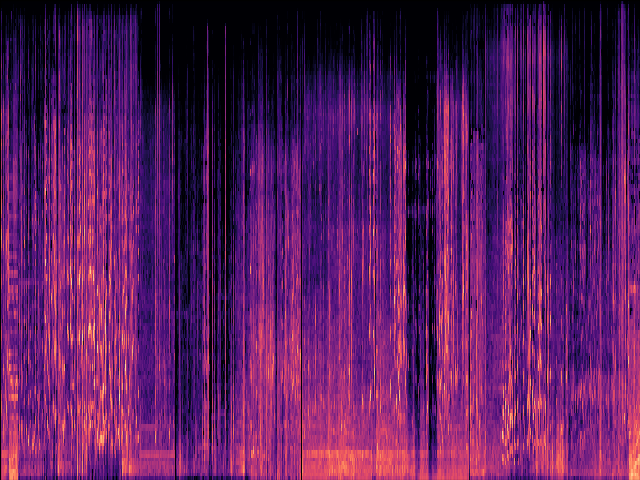

In [27]:
Image('../../data/output/single/angry_01.png')

In [57]:
# MFCC
def create_spectrogram_mfcc(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig, ax = plt.subplots(nrows=2, sharex=True)
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.mfcc(y=y, sr=sr)
    # log_ms = librosa.power_to_db(ms, ref=np.max)
    # librosa.display.specshow(log_ms, sr=sr)
    
    ax[0].set(title='Mel spectrogram')
    ax[0].label_outer()
    img = librosa.display.specshow(ms, x_axis='time', ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    ax[1].set(title='MFCC')
    
    fig.savefig(image_file)
    
    # plt.close(fig)
    
    img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                                   x_axis='time', y_axis='mel', fmax=8000,
                                   ax=ax[0])
    fig.colorbar(img, ax=[ax[0]])
    ax[0].set(title='Mel spectrogram')
    ax[0].label_outer()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    ax[1].set(title='MFCC')
    

def create_pngs_from_wavs_mfcc(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram_mfcc(input_file, output_file)

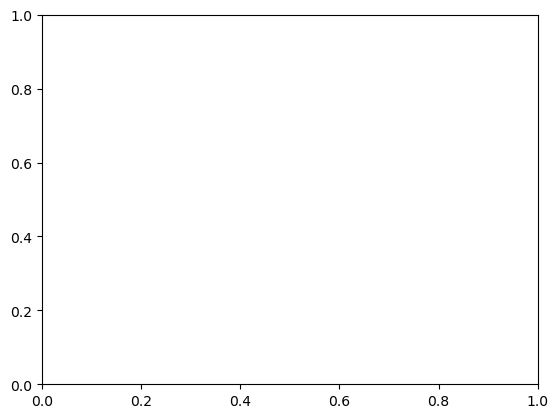

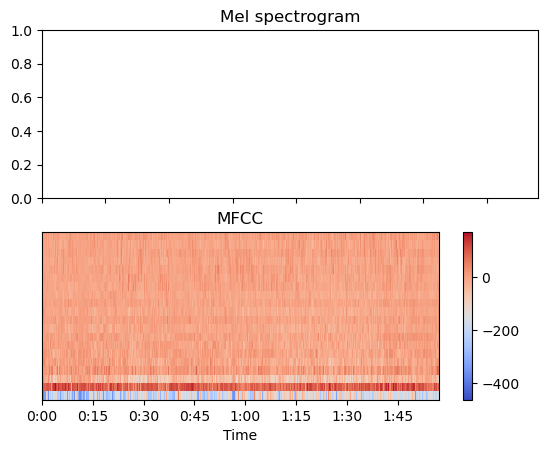

In [58]:
create_pngs_from_wavs_mfcc('../../data/audios_VSD/single', '../../data/output/single')